Name: MAYUKHA THUMIKI

UTA ID: 1002055616

References:
#####https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions
#####https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
#####https://towardsdatascience.com/feature-encoding-techniques-in-machine-learning-with-python-implementation-dbf933e64aa
#####https://pbpython.com/categorical-encoding.html
#####https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomContrast
#####https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomCrop
#####https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomTranslation
#####https://keras.io/api/layers/pooling_layers/max_pooling2d/
#####https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

###Importing Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import cv2
import os

tf.random.set_seed(23)
from tensorflow.keras.applications import EfficientNetB2

###Understanding dataset

In [ ]:
#Source: https://www.kaggle.com/code/anand1994sp/facial-expression
data_dir='/content/gdrive/MyDrive/FacialExpressionRecognition'
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + "/train")
classes_valid = os.listdir(data_dir + "/validation")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')
classes_train.pop(0)
classes_valid.pop(0)
print(classes_train)
print(classes_valid)
      

['train', 'validation']
Train Classes - ['.DS_Store', 'neutral', 'surprise', 'sad', 'happy', 'angry', 'disgust', 'fear']
Validation Classes - ['.DS_Store', 'happy', 'neutral', 'angry', 'surprise', 'sad', 'disgust', 'fear']
['neutral', 'surprise', 'sad', 'happy', 'angry', 'disgust', 'fear']
['happy', 'neutral', 'angry', 'surprise', 'sad', 'disgust', 'fear']


In [ ]:
train_path = Path("/kaggle/input/facial-emotion-expressions/images/train")
valid_path = Path("/kaggle/input/facial-emotion-expressions/images/validation")

In [ ]:
batch_size = 64
epochs = 40
img_channel = 3
img_width, img_height = (48,48)
train_dataset_main = data_dir + "/train"
valid_dataset_main = data_dir + "/validation"

In [ ]:
def create_dataset_df(main_path, dataset_name):
    print(f"{dataset_name} is creating ...")
    df = {"img_path":[],"class_names":[]}
    for class_names in os.listdir(main_path):
            for img_path in glob.glob(f"{main_path}/{class_names}/*"):
                df["img_path"].append(img_path)
                df["class_names"].append(class_names)
    df = pd.DataFrame(df)
    print(f"{dataset_name} is created !")
    return df

In [ ]:
my_train = create_dataset_df(train_dataset_main, "Train dataset")
my_valid=create_dataset_df(valid_dataset_main, "Validation dataset")

Train dataset is creating ...
Train dataset is created !
Validation dataset is creating ...
Validation dataset is created !


In [ ]:
my_train

,img_path,class_names
0,/content/gdrive/MyDrive/FacialExpressionRecogn...,neutral
1,/content/gdrive/MyDrive/FacialExpressionRecogn...,neutral
2,/content/gdrive/MyDrive/FacialExpressionRecogn...,neutral
3,/content/gdrive/MyDrive/FacialExpressionRecogn...,neutral
4,/content/gdrive/MyDrive/FacialExpressionRecogn...,neutral
...,...,...
28824,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear
28825,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear
28826,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear
28827,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear


In [ ]:
my_valid

,img_path,class_names
0,/content/gdrive/MyDrive/FacialExpressionRecogn...,happy
1,/content/gdrive/MyDrive/FacialExpressionRecogn...,happy
2,/content/gdrive/MyDrive/FacialExpressionRecogn...,happy
3,/content/gdrive/MyDrive/FacialExpressionRecogn...,happy
4,/content/gdrive/MyDrive/FacialExpressionRecogn...,happy
...,...,...
7061,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear
7062,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear
7063,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear
7064,/content/gdrive/MyDrive/FacialExpressionRecogn...,fear


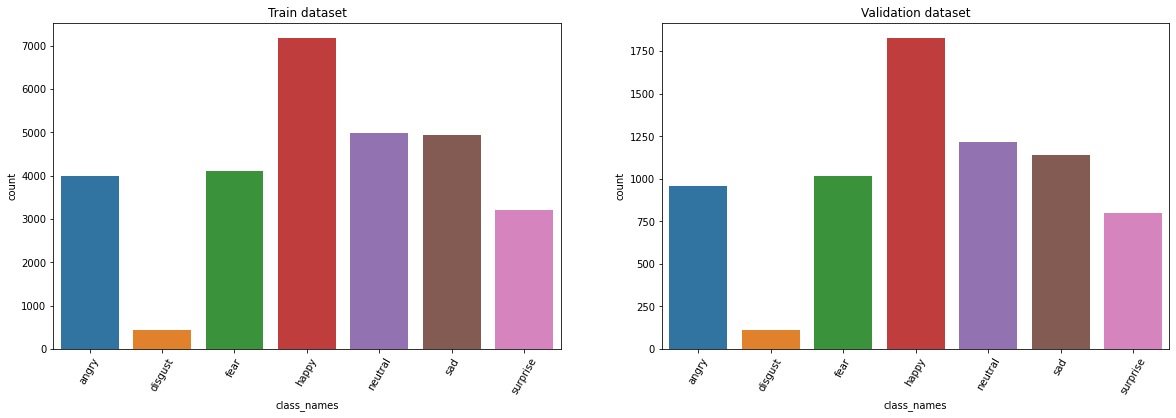

In [ ]:
plt.figure(figsize=(20,6))
# train dataset
plt.subplot(1,2,1)
sns.countplot(data=my_train.sort_values("class_names"),x="class_names")
plt.title("Train dataset")
plt.xticks(rotation = 60)
# validation dataset
plt.subplot(1,2,2)
sns.countplot(data=my_valid.sort_values("class_names"),x="class_names")
plt.title("Validation dataset")
plt.xticks(rotation = 60)

plt.show()

##My contribution

####Encoding

In [ ]:
#My contribution frequency encoding
#https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
#https://towardsdatascience.com/feature-encoding-techniques-in-machine-learning-with-python-implementation-dbf933e64aa
#https://pbpython.com/categorical-encoding.html
freq = my_train['class_names'].value_counts()

freq_sorted = freq.sort_values()
encoding = {cat: i for i, cat in enumerate(freq_sorted.index)}

my_train['class_names'] = my_train['class_names'].map(encoding)
my_train["class_names"].value_counts()


6    7172
5    4982
4    4938
3    4103
2    3993
1    3205
0     436
Name: class_names, dtype: int64

In [ ]:
freq = my_valid['class_names'].value_counts()

freq_sorted = freq.sort_values()
encoding = {cat: i for i, cat in enumerate(freq_sorted.index)}
my_valid['class_names'] = my_valid['class_names'].map(encoding)


In [ ]:
my_valid["class_names"].value_counts()

6    1825
5    1216
4    1139
3    1018
2     960
1     797
0     111
Name: class_names, dtype: int64

In [ ]:
my_train.head()

,img_path,class_names
0,/content/gdrive/MyDrive/FacialExpressionRecogn...,5
1,/content/gdrive/MyDrive/FacialExpressionRecogn...,5
2,/content/gdrive/MyDrive/FacialExpressionRecogn...,5
3,/content/gdrive/MyDrive/FacialExpressionRecogn...,5
4,/content/gdrive/MyDrive/FacialExpressionRecogn...,5


In [ ]:
my_valid.head()

,img_path,class_names
0,/content/gdrive/MyDrive/FacialExpressionRecogn...,6
1,/content/gdrive/MyDrive/FacialExpressionRecogn...,6
2,/content/gdrive/MyDrive/FacialExpressionRecogn...,6
3,/content/gdrive/MyDrive/FacialExpressionRecogn...,6
4,/content/gdrive/MyDrive/FacialExpressionRecogn...,6


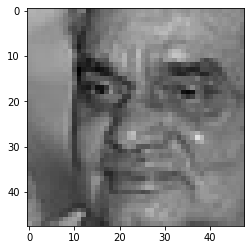

In [ ]:
img = cv2.imread(my_train.img_path[0])
plt.imshow(img)

In [ ]:
my_train_labels = tf.keras.utils.to_categorical(my_train["class_names"])
my_valid_labels = tf.keras.utils.to_categorical(my_valid["class_names"])

In [ ]:
my_train_labels[:10]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

(48, 48, 3)


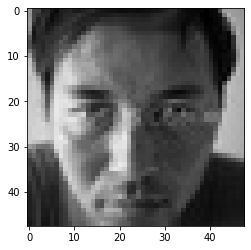

In [ ]:
input_image = cv2.imread(my_train.img_path[8])
print(input_image.shape)
plt.imshow(input_image)

###Data augmentation

In [ ]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [ ]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 96 
BATCH_SIZE = 64

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

#My contribution
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomContrast
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomCrop
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomTranslation
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.1),
    tf.keras.layers.experimental.preprocessing.RandomCrop(height=96, width=96),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
])

In [ ]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE #to find a good allocation of its CPU budget across all parameters
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [ ]:
# Creating Train Dataset object and Verifying it
%time 
my_train_dataset = get_dataset(my_train["img_path"], my_train_labels)

#iter() returns an iterator of the given object
#next() returns the next number in an iterator
my_image , my_label = next(iter(my_train_dataset)) 
print(my_image.shape)
print(my_label.shape)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


(64, 96, 96, 3)
(64, 7)


In [ ]:
%time 
my_val_dataset = get_dataset(my_valid["img_path"] , my_valid_labels , train = False)

my_image , my_label = next(iter(my_val_dataset))
print(my_image.shape)
print(my_label.shape)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
(64, 96, 96, 3)
(64, 7)


###Model building

In [ ]:
# Building EfficientNet model


backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 128)         1622144   
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                      

In [ ]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:

len(my_train_labels),len(my_valid_labels)

(28829, 7066)

In [ ]:
my_classTotals = my_train_labels.sum(axis=0)
my_classWeight = my_classTotals.max() / my_classTotals

my_class_weight = {e : weight for e , weight in enumerate(my_classWeight)}
print(my_class_weight)

{0: 16.449541, 1: 2.2377534, 2: 1.7961433, 3: 1.7479893, 4: 1.4524099, 5: 1.4395825, 6: 1.0}


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

In [ ]:
# Train the model
history1 = model.fit(
    my_train_dataset,
    steps_per_epoch=len(my_train_labels)//BATCH_SIZE,
    epochs=2,
    callbacks=[early_stopping],
    validation_data=my_val_dataset,
    validation_steps = len(my_valid_labels)//BATCH_SIZE,
    class_weight=my_class_weight
)

Epoch 1/2
450/450 [==============================] - 1345s 3s/step - loss: 1.3136 - accuracy: 0.8582 - precision: 0.8888 - recall: 0.8302 - val_loss: 75.7421 - val_accuracy: 0.1419 - val_precision: 0.1419 - val_recall: 0.1419
Epoch 2/2
450/450 [==============================] - 107s 237ms/step - loss: 1.3703 - accuracy: 0.8317 - precision: 0.8671 - recall: 0.7835 - val_loss: 15.8298 - val_accuracy: 0.1428 - val_precision: 0.1428 - val_recall: 0.1428


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=2,mode="auto")

In [ ]:
#https://keras.io/api/layers/pooling_layers/max_pooling2d/
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

# Train the model
history2 = model2.fit(
    my_train_dataset,
    steps_per_epoch=len(my_train_labels)//BATCH_SIZE,
    epochs=3,
    callbacks=[early_stopping],
    validation_data=my_val_dataset,
    validation_steps = len(my_valid_labels)//BATCH_SIZE,
    class_weight=my_class_weight
                    )



Epoch 1/3
450/450 [==============================] - 78s 165ms/step - loss: 2.3080 - accuracy: 0.8189 - precision: 0.8546 - recall: 0.7852 - val_loss: 8.5437 - val_accuracy: 0.1426 - val_precision: 0.1427 - val_recall: 0.1426
Epoch 2/3
450/450 [==============================] - 81s 179ms/step - loss: 1.5527 - accuracy: 0.7771 - precision: 0.8567 - recall: 0.7262 - val_loss: 9.8096 - val_accuracy: 0.1425 - val_precision: 0.1425 - val_recall: 0.1425
Epoch 3/3
450/450 [==============================] - 75s 168ms/step - loss: 1.5741 - accuracy: 0.7728 - precision: 0.8558 - recall: 0.7228 - val_loss: 8.3642 - val_accuracy: 0.1418 - val_precision: 0.1418 - val_recall: 0.1418


In [ ]:
#https://keras.io/api/layers/pooling_layers/max_pooling2d/
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='sigmoid', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='LeakyReLU', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

# Train the model
batch_size = 64
history3 = model3.fit(
    my_train_dataset,
    steps_per_epoch=len(my_train_labels)//batch_size,
    epochs=5,
    callbacks=[early_stopping],
    validation_data=my_val_dataset,
    validation_steps = len(my_valid_labels)//batch_size,
    class_weight=my_class_weight
                    )

In [ ]:
model4 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='sigmoid', padding='same'),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='tanh', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='LeakyReLU', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

# Train the model
batch_size = 128
history4 = model4.fit(
    my_train_dataset,
    steps_per_epoch=len(my_train_labels)//batch_size,
    epochs=3,
    callbacks=[early_stopping],
    validation_data=my_val_dataset,
    validation_steps = len(my_valid_labels)//batch_size,
    class_weight=my_class_weight
                    )

Epoch 1/3


225/225 [==============================] - 596s 3s/step - loss: 2.0464 - accuracy: 0.8201 - precision: 0.8325 - recall: 0.8056 - val_loss: 17.2533 - val_accuracy: 0.0312 - val_precision: 0.0312 - val_recall: 0.0312
Epoch 2/3
225/225 [==============================] - 578s 3s/step - loss: 1.6317 - accuracy: 0.8080 - precision: 0.8455 - recall: 0.7751 - val_loss: 8.4774 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
225/225 [==============================] - 679s 3s/step - loss: 1.0277 - accuracy: 0.8038 - precision: 0.8381 - recall: 0.7646 - val_loss: 2.9106 - val_accuracy: 0.5017 - val_precision: 0.5020 - val_recall: 0.5011


###Performance comparison

In [ ]:
acc1 = history1.history['val_accuracy'][-1]
print(acc1)
acc2 = history2.history['val_accuracy'][-3]
print(acc2)
acc3 = history3.history['val_accuracy'][-2]
print(acc3)
acc4 = history4.history['val_accuracy'][-1]
print(acc4)

0.1427556872367859
0.14261363446712494
0.49715909361839294
0.5017045736312866


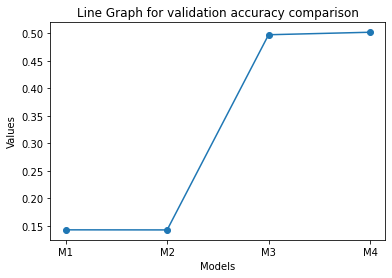

In [ ]:
#https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
values = []
values.append(acc1)
values.append(acc2)
values.append(acc3)
values.append(acc4)
labels = ['M1', 'M2', 'M3', 'M4']
plt.plot(labels, values, marker='o')

# Add axis labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Line Graph for validation accuracy comparison')

# Show plot
plt.show()

###Future work:

Done with last image


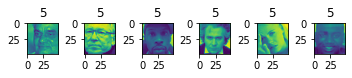

In [ ]:
import skimage

#https://www.section.io/engineering-education/image-preprocessing-in-python/
def normalize_images(n_rows, data_df):
    for i in range(n_rows):
        if(i==n_rows-1):
            print("Done with last image")
        idx=i
        img = cv2.imread(data_df.img_path[idx])
        face = data_df.class_names[idx]
        
        gray_image = skimage.color.rgb2gray(img)
        norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
        plt.subplot(n_rows, n_rows, i+1)
        plt.title(face)
        plt.imshow(norm_image)
    
normalize_images(6, my_train)